## 模型初探

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [152]:
seed = 7
test_size = 0.33

##  1.1 Pre-process Data

In [153]:
# load data
data = pd.read_csv('../data/pima-indians-diabetes.csv')
data.head(3).append(data.tail(3))

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,Serum insulin,BMI,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
data.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,Serum insulin,BMI,Diabetes pedigree function,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
def splitXy( data ):
    dataset = data.values
    X = dataset[:,0:-1]
    y = dataset[:,-1]
    return X, y

In [6]:
# split data into X and y
X, y = splitXy(data)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
random_state=seed)

In [7]:
print( 'The size of X is', X.shape )
print( 'The size of y is', y.shape )
print( 'The size of X_train is', X_train.shape )
print( 'The size of y_train is', y_train.shape )
print( 'The size of X_test is', X_test.shape )
print( 'The size of y_test is', y_test.shape )

The size of X is (768, 8)
The size of y is (768,)
The size of X_train is (514, 8)
The size of y_train is (514,)
The size of X_test is (254, 8)
The size of y_test is (254,)


## 1.2 Train XGBoost Model 

In [8]:
def fit( X, y ):
    model = XGBClassifier()
    model.fit(X, y)
    return model

In [9]:
model = fit(X_train, y_train)
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


## 1.3 Make Prediction 

In [10]:
def predict( model, X, y ):
    # make predictions for X
    y_pred = model.predict(X)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y, predictions)
    return predictions, accuracy

In [11]:
_, accuracy = predict(model, X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.95%


## 1.4 Save and Load Model 

XGBoost can be used to create some of the most performant models for tabular data using the gradient boosting algorithm. Once trained, it is often a good practice to save your model to file for later use in making predictions new test and validation datasets and entirely new data. The step is illustrated as follows:
+ save the model
+ load the model
+ check the model

In [12]:
import pickle

Pickle is the standard way of serializing objects in Python. You can use the Python pickle API to serialize your machine learning algorithms and save the serialized format to a file.

In [13]:
# save model to file
pickle.dump(model, open("pima.dat", "wb"))

In [14]:
# load model from file
pima_model = pickle.load(open("pima.dat", "rb"))

print(pima_model)
_, accuracy = predict(model, X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

## 1.5 Visualize Single XGBoost Decision Tree 

In [19]:
from graphviz import Digraph
from xgboost import plot_tree
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

In [16]:
plt.rcParams["figure.figsize"] = [40,20]

 比如你想看第 5 棵树是如何分裂的，设 num_trees = 4，注意 python 第一个对应的是 index 0

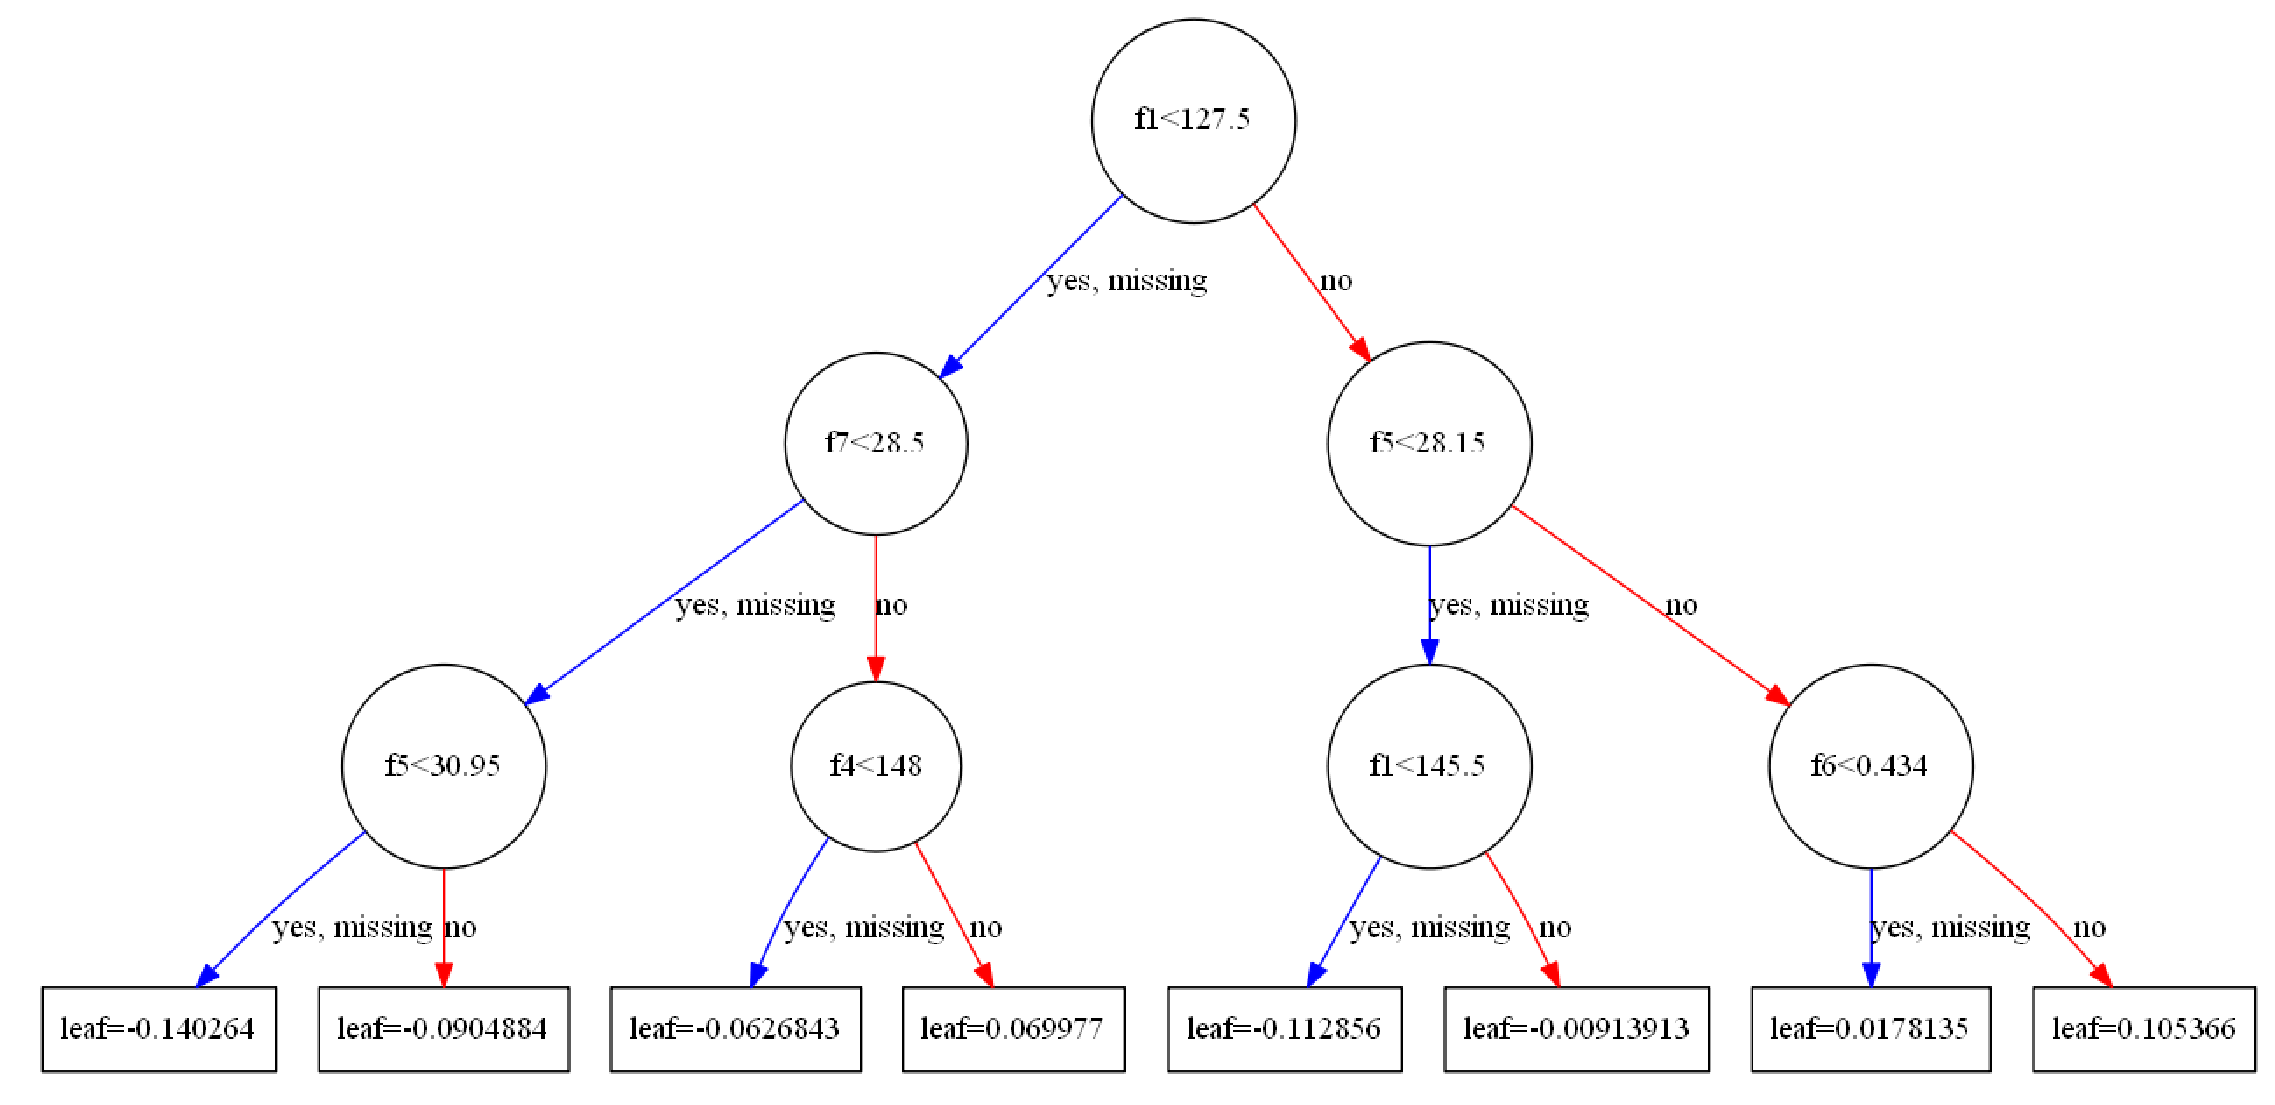

In [20]:
plot_tree(model, num_trees = 4)
plt.show()
#plt.savefig('Tree from Top to Bottom.png')

 # Data Preparation 
 

## 2.1 Encode String Output for Classification

The iris flowers classifcation problem is an example of a problem that has a string class value. This is a prediction problem where given measurements of iris flowers in centimeters, the task is to predict to which species a given flower belongs. Below is a sample of the raw dataset. You can learn more about this dataset and download the raw data in CSV format from the UCI Machine Learning Repository. http://archive.ics.uci.edu/ml/datasets/Iris

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [22]:
# load data
data = pd.read_csv('../data/iris.csv')
data.head(3).append(data.tail(3)) 

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [23]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
# split data into X and y
X, y = splitXy(data)
# encode string class values as integers
label_encoded_y = LabelEncoder().fit_transform(y)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, label_encoded_y, test_size=test_size,
random_state=seed)

In [39]:
y[1:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [40]:
label_encoded_y[1:5]

array([0, 0, 0, 0], dtype=int64)

In [41]:
print( 'The size of X is', X.shape )
print( 'The size of y is', y.shape )
print( 'The size of X_train is', X_train.shape )
print( 'The size of y_train is', y_train.shape )
print( 'The size of X_test is', X_test.shape )
print( 'The size of y_test is', y_test.shape )

The size of X is (150, 4)
The size of y is (150,)
The size of X_train is (100, 4)
The size of y_train is (100,)
The size of X_test is (50, 4)
The size of y_test is (50,)


In [42]:
def fit_predict(X_train, y_train, X_test, y_test, verbose=True):
    model = fit(X_train, y_train)
    _, accuracy = predict(model, X_test, y_test)
    if verbose == True:
        print(model)
        print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [43]:
fit_predict(X_train, y_train, X_test, y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Accuracy: 92.00%


In [45]:
# save model to file
pickle.dump(model, open("iris.dat", "wb"))

## 2.2 One Hot Encode Categorical Data

Some datasets only contain categorical data, for example the breast cancer dataset. This dataset describes the technical details of breast cancer biopsies and the prediction task is to predict whether or not the patient has a recurrence of cancer. Below is a sample of the raw dataset. You can learn more about this dataset at the UCI Machine Learning Repository. http://archive.ics.uci.edu/ml/datasets/Breast+Cancer

In [120]:
# load data
data = pd.read_csv('../data/datasets-uci-breast-cancer.csv')
data.head(3).append(data.tail(3))

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
283,'30-39','premeno','30-34','6-8','yes','2','right','right_up','no','no-recurrence-events'
284,'50-59','premeno','15-19','0-2','no','2','right','left_low','no','no-recurrence-events'
285,'50-59','ge40','40-44','0-2','no','3','left','right_up','no','no-recurrence-events'


In [121]:
data.describe()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
count,286,286,286,286,278,286,286,285,286,286
unique,6,3,11,7,2,3,2,5,2,2
top,'50-59','premeno','30-34','0-2','no','2','left','left_low','no','no-recurrence-events'
freq,96,150,60,213,222,130,152,110,218,201


In [122]:
# split data into X and y
X, y = splitXy(data)
X = X.astype(str)
# encode string input values as integers
columns = []
for i in range(0, X.shape[1]):
    feature = LabelEncoder().fit_transform(X[:,i]).reshape(X.shape[0], 1)
    onehot_encoder = OneHotEncoder(sparse=False)
    feature = onehot_encoder.fit_transform(feature)
    print("X[",i,"] shape ::", feature.shape)
    columns.append(feature)
# collapse columns into array
encoded_x = np.column_stack(columns)
print("X shape ::", encoded_x.shape)
# encode string class values as integers
label_encoded_y = LabelEncoder().fit_transform(y)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(encoded_x, label_encoded_y, test_size=test_size, random_state=seed)

X[ 0 ] shape :: (286, 6)
X[ 1 ] shape :: (286, 3)
X[ 2 ] shape :: (286, 11)
X[ 3 ] shape :: (286, 7)
X[ 4 ] shape :: (286, 3)
X[ 5 ] shape :: (286, 3)
X[ 6 ] shape :: (286, 2)
X[ 7 ] shape :: (286, 6)
X[ 8 ] shape :: (286, 2)
X shape :: (286, 43)


# pandas 中的 get_dummies 函数是生成 dummy variable 更简单的方法
pd.get_dummies(data)

In [55]:
print( 'The size of X is', X.shape )
print( 'The size of y is', y.shape )
print( 'The size of X_train is', X_train.shape )
print( 'The size of y_train is', y_train.shape )
print( 'The size of X_test is', X_test.shape )
print( 'The size of y_test is', y_test.shape )

The size of X is (286, 9)
The size of y is (286,)
The size of X_train is (191, 43)
The size of y_train is (191,)
The size of X_test is (95, 43)
The size of y_test is (95,)


In [54]:
fit_predict(X_train, y_train, X_test, y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Accuracy: 71.58%


In [57]:
pickle.dump(model, open("breast_cancer.dat", "wb"))

## 2.3 Support for Missing Data

The Horse Colic dataset is a good example to demonstrate this capability as it contains a large percentage of missing data, approximately 30%. You can learn more about the Horse Colic dataset and download the raw data le from the UCI Machine Learning repository. https://archive.ics.uci.edu/ml/datasets/Horse+Colic

In [58]:
# load data
data = pd.read_csv("../data/horse-colic.csv")
data.head(3).append(data.tail(3))

,surgery,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,lesion 1,lesion 2,lesion 3,class
0,2,1,530101,38.5,66,28,3,3,?,2,...,45,8.4,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.3,40,24,1,1,3,1,...,33,6.7,?,?,1,2,0,0,0,1
297,1,1,529386,37.5,72,30,4,3,4,1,...,60,6.8,?,?,2,1,3205,0,0,2
298,1,1,530612,36.5,100,24,3,3,3,1,...,50,6,3,3.4,1,1,2208,0,0,1
299,1,1,534618,37.2,40,20,?,?,?,?,...,36,62,1,1,3,2,6112,0,0,2


In [59]:
data.describe()

,Age,Hospital Number,surgical lesion,lesion 1,lesion 2,lesion 3,class
count,300.000000,3.000000e+02,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.080000,1.085889e+06,1.363333,3657.880000,90.226667,7.363333,1.670000
std,0.271746,1.529801e+06,0.481763,5399.513513,649.569234,127.536674,0.470998
min,1.000000,5.184760e+05,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,5.289040e+05,1.000000,2111.750000,0.000000,0.000000,1.000000
50%,1.000000,5.303055e+05,1.000000,2673.500000,0.000000,0.000000,2.000000
75%,1.000000,5.347275e+05,2.000000,3209.000000,0.000000,0.000000,2.000000
max,2.000000,5.305629e+06,2.000000,41110.000000,7111.000000,2209.000000,2.000000


In [60]:
# split data into X and y
X, y = splitXy(data)
# set missing values to 0
X[X == '?'] = 0
# convert to numeric
X = X.astype('float32')
# encode Y class values as integers
label_encoded_y = LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, label_encoded_y,
test_size=test_size, random_state=seed)

In [61]:
fit_predict(X_train, y_train, X_test, y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Accuracy: 83.84%


In [62]:
# split data into X and y
X, y = splitXy(data)
# set missing values to NaN
X[X == '?'] = np.nan
# convert to numeric
X = X.astype('float32')
# encode Y class values as integers
label_encoded_y = LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, label_encoded_y,
test_size=test_size, random_state=seed)

In [63]:
fit_predict(X_train, y_train, X_test, y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Accuracy: 85.86%


 # Cross-Validation 

In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [75]:
# load data
data = pd.read_csv('../data/pima-indians-diabetes.csv')
X, y = splitXy(data)
model = XGBClassifier()

+ KFold 适用于二分类且类别平衡
+ StratifiedKFold 适用于多分类或类别不平衡
+ cross_val_score 计算一些指标

In [76]:
# CV model for binary class or balanced class
kfold = KFold(n_splits=5, random_state=7)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 76.44% (5.09%)


In [77]:
# CV model for multi-class or inbalanced class
kfold = StratifiedKFold(n_splits=5, random_state=7)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 76.57% (3.74%)


# Fearure Importance and Selection 

In [90]:
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel

## 4.1 Feature Importance

In [79]:
# feature importance
print(pima_model.feature_importances_)
# feature
feature = data.columns.tolist()[0:-1]
print(feature)

[ 0.07094595  0.1858108   0.08952703  0.08445946  0.07263514  0.16047297
  0.12837838  0.20777027]
['Number of times pregnant ', 'Plasma glucose concentration', 'Diastolic blood pressure', 'Triceps skin fold thickness', 'Serum insulin', 'BMI', 'Diabetes pedigree function', 'Age ']


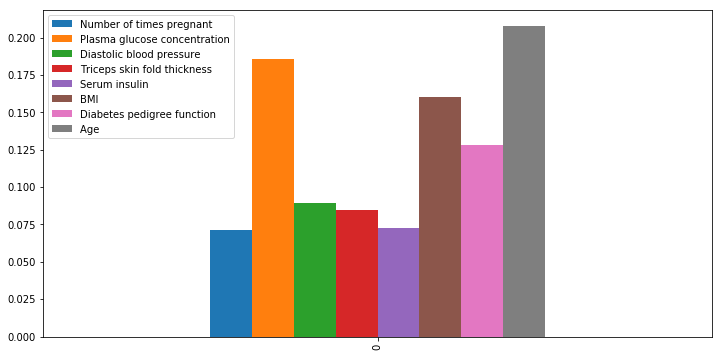

In [87]:
# mannually plot
df = pd.DataFrame(data=pima_model.feature_importances_, index=feature).T
df.plot.bar(figsize=(12,6))

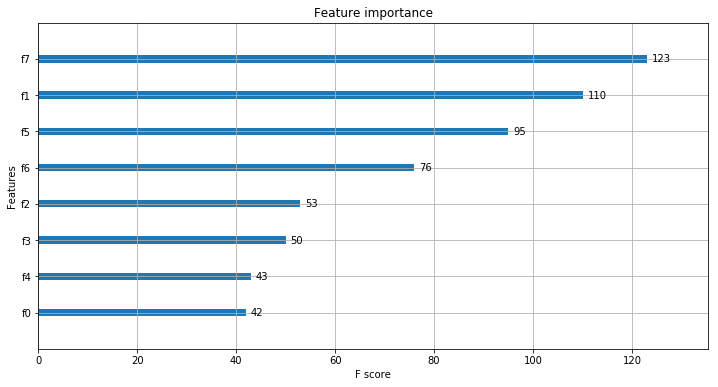

In [91]:
plt.rcParams["figure.figsize"] = [12,6]
# Using the XGBoost built-in function to plot
plot_importance(pima_model)
plt.show()

## 4.2 Feature Selection 

In [92]:
data = pd.read_csv('../data/pima-indians-diabetes.csv')
# split data into X and y
X, y = splitXy(data)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
random_state=seed)

In [ ]:
# Fit model using each importance as a threshold
thresholds = np.sort(pima_model.feature_importances_)
for c in thresholds:
    # select features using threshold
    selection = SelectFromModel(pima_model, threshold=c, prefit=True)
    select_X_train = selection.transform(X_train)
    select_X_test = selection.transform(X_test)
    # train model
    selection_model = fit(select_X_train, y_train)
    # eval model
    _, accuracy = predict(selection_model, select_X_test, y_test)
    print("Threshold = %.3f, n = %d, Accuracy: %.2f%%" % (c, select_X_train.shape[1], accuracy*100.0))

## Early Stopping 

In [94]:
# fit model on training data
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)
_, accuracy = predict(model, X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.259843
[1]	validation_0-error:0.26378
[2]	validation_0-error:0.26378
[3]	validation_0-error:0.255906
[4]	validation_0-error:0.255906
[5]	validation_0-error:0.26378
[6]	validation_0-error:0.23622
[7]	validation_0-error:0.255906
[8]	validation_0-error:0.248031
[9]	validation_0-error:0.248031
[10]	validation_0-error:0.248031
[11]	validation_0-error:0.232283
[12]	validation_0-error:0.228346
[13]	validation_0-error:0.228346
[14]	validation_0-error:0.228346
[15]	validation_0-error:0.228346
[16]	validation_0-error:0.228346
[17]	validation_0-error:0.228346
[18]	validation_0-error:0.224409
[19]	validation_0-error:0.232283
[20]	validation_0-error:0.232283
[21]	validation_0-error:0.23622
[22]	validation_0-error:0.23622
[23]	validation_0-error:0.232283
[24]	validation_0-error:0.228346
[25]	validation_0-error:0.228346
[26]	validation_0-error:0.224409
[27]	validation_0-error:0.224409
[28]	validation_0-error:0.228346
[29]	validation_0-error:0.232283
[30]	validation_0-error:0.

In [95]:
# fit model on training data
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set,
verbose=True)
_, accuracy = predict(model, X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.22179	validation_0-logloss:0.655154	validation_1-error:0.259843	validation_1-logloss:0.660186
[1]	validation_0-error:0.202335	validation_0-logloss:0.623321	validation_1-error:0.26378	validation_1-logloss:0.634854
[2]	validation_0-error:0.196498	validation_0-logloss:0.596815	validation_1-error:0.26378	validation_1-logloss:0.612239
[3]	validation_0-error:0.200389	validation_0-logloss:0.574026	validation_1-error:0.255906	validation_1-logloss:0.593118
[4]	validation_0-error:0.202335	validation_0-logloss:0.553853	validation_1-error:0.255906	validation_1-logloss:0.578303
[5]	validation_0-error:0.202335	validation_0-logloss:0.536789	validation_1-error:0.26378	validation_1-logloss:0.564942
[6]	validation_0-error:0.194553	validation_0-logloss:0.521477	validation_1-error:0.23622	validation_1-logloss:0.555113
[7]	validation_0-error:0.200389	validation_0-logloss:0.507801	validation_1-error:0.255906	validation_1-logloss:0.54499
[8]	validation_0-error:0.194553	validation_0-l

[68]	validation_0-error:0.118677	validation_0-logloss:0.302821	validation_1-error:0.216535	validation_1-logloss:0.503108
[69]	validation_0-error:0.120623	validation_0-logloss:0.30198	validation_1-error:0.216535	validation_1-logloss:0.502673
[70]	validation_0-error:0.120623	validation_0-logloss:0.29991	validation_1-error:0.216535	validation_1-logloss:0.502662
[71]	validation_0-error:0.122568	validation_0-logloss:0.298055	validation_1-error:0.216535	validation_1-logloss:0.50343
[72]	validation_0-error:0.120623	validation_0-logloss:0.296987	validation_1-error:0.216535	validation_1-logloss:0.504037
[73]	validation_0-error:0.120623	validation_0-logloss:0.295123	validation_1-error:0.216535	validation_1-logloss:0.504439
[74]	validation_0-error:0.118677	validation_0-logloss:0.294368	validation_1-error:0.216535	validation_1-logloss:0.503697
[75]	validation_0-error:0.118677	validation_0-logloss:0.293513	validation_1-error:0.216535	validation_1-logloss:0.504477
[76]	validation_0-error:0.116732	va

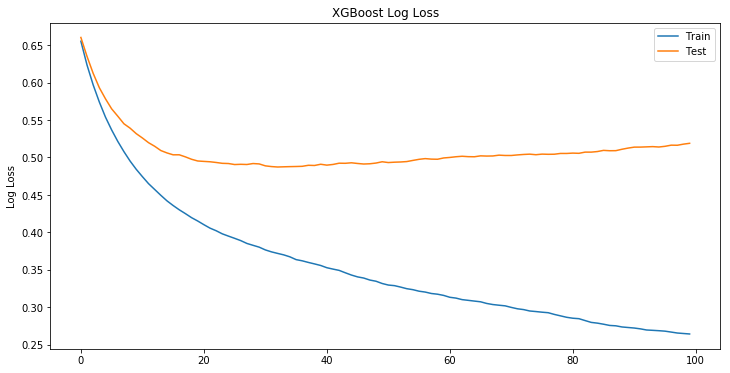

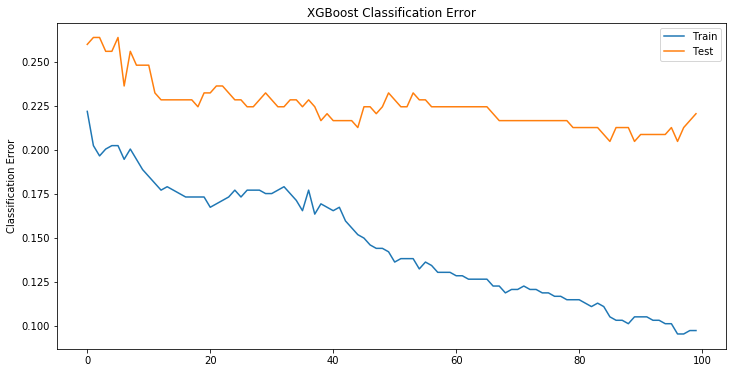

In [96]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

# VI. Multi-threading Support for XGBoost

We will use the Otto Group Product Classification Challenge dataset. This dataset is available from Kaggle. https://www.kaggle.com/c/otto-group-product-classification-challenge/data
This dataset describes the 93 obfuscated details of more than 61,000 products grouped into 10 product categories (e.g. fashion, electronics, etc.). Input attributes are counts of different events of some kind. The goal is to make predictions for new products as an array of probabilities for each of the 10 categories and models are evaluated using multiclass logarithmic loss (also called cross entropy).

## 6.1 Impact of the Number of Threads

XGBoost 是用 C++ 实现的而且用 OpenMP API 做并行处理。将模型里面 nthread 设为 -1 代表使用系统里所有的线程，这也是默认设置。

In [100]:
from time import time

In [108]:
data = pd.read_csv('../data/Otto train.csv')
X, y = splitXy(data)
# encode string class values as integers
label_encoded_y = LabelEncoder().fit_transform(y)

In [109]:
X.shape

(61878, 94)

In [110]:
model = XGBClassifier(nthread=-1)

In [111]:
# evaluate the effect of the number of threads
results = []
num_threads = [1, 2, 3, 4]
for n in num_threads:
    start = time()
    model = XGBClassifier(nthread=n)
    model.fit(X, label_encoded_y)
    elapsed = time() - start
    print(n, elapsed)
    results.append(elapsed)

1 216.7766752243042
2 107.66076517105103
3 75.71557068824768
4 67.20171976089478


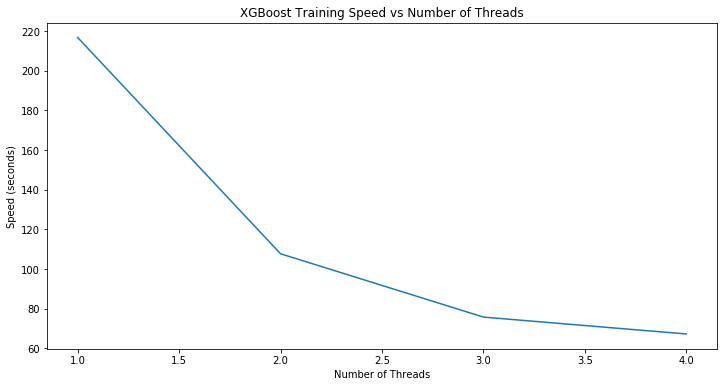

In [112]:
# plot results
plt.plot(num_threads, results)
plt.ylabel('Speed (seconds)')
plt.xlabel('Number of Threads')
plt.title('XGBoost Training Speed vs Number of Threads')
plt.show()

## 6.2 Cross Validating XGBoost in Parallel 

+ 只并行化 k-Fold 验证 (n_jobs = -1, nthread = 1)
+ 只并行化 XGBClassifier (n_jobs = 1, nthread = -1)
+ 两个都并行化 (n_jobs = -1, nthread = -1

In [114]:
# prepare cross validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

# Single Thread XGBoost, Parallel Thread CV
start = time()
model = XGBClassifier(nthread=1)
results = cross_val_score(model, X, label_encoded_y, cv=kfold, scoring='neg_log_loss',
n_jobs=-1)
elapsed = time() - start
print("Single Thread XGBoost, Parallel Thread CV: %f" % (elapsed))

# Parallel Thread XGBoost, Single Thread CV
start = time()
model = XGBClassifier(nthread=-1)
results = cross_val_score(model, X, label_encoded_y, cv=kfold, scoring='neg_log_loss',
n_jobs=1)
elapsed = time() - start
print("Parallel Thread XGBoost, Single Thread CV: %f" % (elapsed))

# Parallel Thread XGBoost and CV
start = time()
model = XGBClassifier(nthread=-1)
results = cross_val_score(model, X, label_encoded_y, cv=kfold, scoring='neg_log_loss',
n_jobs=-1)
elapsed = time() - start
print("Parallel Thread XGBoost and CV: %f" % (elapsed))

Single Thread XGBoost, Parallel Thread CV: 352.023199
Parallel Thread XGBoost, Single Thread CV: 855.317523
Parallel Thread XGBoost and CV: 347.801777


# VII. Hyper-Parameter Tuning

In the 1999 paper Greedy Function Approximation: A Gradient Boosting Machine, Jerome Friedman comments on the trade-off between the number of trees ( MM ) and the learning rate ( vv ): Studies in the paper preferred
+ a shrinkage value of 0.1
+ a number of trees in the range 100 to 500
+ the number of terminal nodes in a tree between 2 and 8
In the 1999 paper Stochastic Gradient Boosting, Friedman
The XGBoost library has following default parameters:
+ max depth = 3.
+ learning rate = 0.1.
+ n estimators = 100.
+ subsample = 1.

## 7.2 Tune the Number and Size of Trees

XGBoost 整个过程就是一个按顺序加树的过程，因此树的个数和树的深度绝对算是一组重要的超参数。接下来做三组调试：

+ 只调树的个数
+ 只调树的深度
+ 同时调树的个数和深度


In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
data = pd.read_csv('../data/Otto train.csv')
X, y = splitXy(data)
# encode string class values as integers
label_encoded_y = LabelEncoder().fit_transform(y)

## Tune the Number of Trees

Best: -0.001034 using {'n_estimators': 200}
-0.010886 (0.000810) with: {'n_estimators': 50}
-0.001098 (0.001313) with: {'n_estimators': 100}
-0.001038 (0.001348) with: {'n_estimators': 150}
-0.001034 (0.001344) with: {'n_estimators': 200}
-0.001035 (0.001346) with: {'n_estimators': 250}
-0.001036 (0.001349) with: {'n_estimators': 300}
-0.001037 (0.001351) with: {'n_estimators': 350}


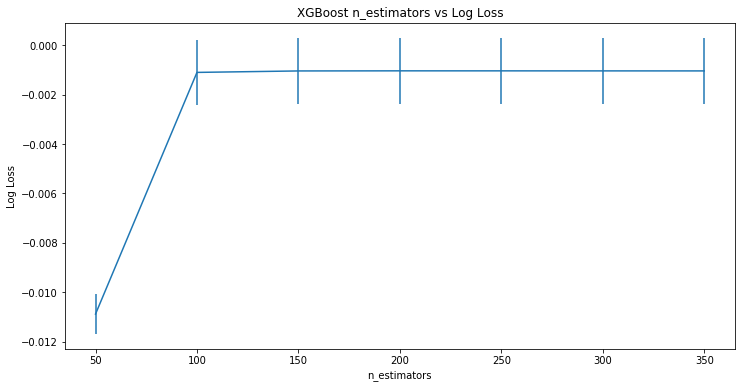

In [117]:
# grid search
model = XGBClassifier()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators.png')

## Tune the Size of Trees

In [147]:
# grid search
model = XGBClassifier()
max_depth = range(1, 11, 2)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold,
verbose=1)
grid_result = grid_search.fit(X, label_encoded_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost max_depth vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')
plt.savefig('max_depth.png')

ValueError: Found input variables with inconsistent numbers of samples: [122607, 286]

## Tune the Number and Size of Trees

In [ ]:
# grid search
model = XGBClassifier()
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold,
verbose=1)
grid_result = grid_search.fit(X, label_encoded_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_max_depth.png')

## 7.3 Tune Learning Rate and The Number of Trees 

一般来说，学习率越小，需要增加树的个数就越大。接下来做两组调试：

只调学习率
同时调树的个数和学习率

## Tune Learning Rate

In [ ]:
# grid search
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(learning_rate, means, yerr=stds)
plt.title("XGBoost learning_rate vs Log Loss")
plt.xlabel('learning_rate')
plt.ylabel('Log Loss')
plt.savefig('learning_rate.png')

## Tune the Number of Trees

In [ ]:
# grid search
model = XGBClassifier()
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = np.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    plt.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_learning_rate.png')

## 7.4 Tune Subsampling

随机森林有列采样和行采样，XGBoost 也有。 接下来做两组调试：

只调行采样比率
只调列采样比率

## Tune the Row Subsampling

In [ ]:
# grid search
model = XGBClassifier()
subsample = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
param_grid = dict(subsample=subsample)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(subsample, means, yerr=stds)
plt.title("XGBoost subsample vs Log Loss")
plt.xlabel('subsample')
plt.ylabel('Log Loss')
plt.savefig('subsample.png')

## Tune the Column Subsampling By Tree

In [ ]:
# grid search
model = XGBClassifier()
colsample_bytree = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
param_grid = dict(colsample_bytree=colsample_bytree)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(colsample_bytree, means, yerr=stds)
plt.title("XGBoost colsample_bytree vs Log Loss")
plt.xlabel('colsample_bytree')
plt.ylabel('Log Loss')
plt.savefig('colsample_bytree.png')

# XGBoost 进阶版

In [156]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle

from sklearn import metrics   # Additional sklearn functions

from sklearn.model_selection import train_test_split    # Cross Validation
from sklearn.tree import DecisionTreeClassifier         # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier     # Random Forest Classifier
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosted Classifier
from xgboost.sklearn import XGBClassifier               # XGBoost Classifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import GridSearchCV    # Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
plt.rcParams["figure.figsize"] = [12,6]

## I. Pre-process Data

In [155]:
seed = 7
test_size = 0.33

In [157]:
data = pd.read_csv('../data/lending-club-data.csv', low_memory=False)
data.head(3).append(data.tail(3))

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none,bad_loans
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,1.0,1.0,1.0,0,8.143500,20141201T000000,1,1,1,0
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,1.0,1.0,1.0,1,2.393200,20161201T000000,1,1,1,1
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,1.0,1.0,1.0,0,8.259550,20141201T000000,1,1,1,0
122604,9695736,11547808,8525,8525,8525,60 months,18.25,217.65,D,D3,...,0.0,1.0,1.0,0,6.958120,20190101T000000,0,1,0,1
122605,9684700,11536848,22000,22000,22000,60 months,19.97,582.50,D,D5,...,1.0,0.0,1.0,0,8.961540,20190101T000000,1,0,1,1
122606,9604874,11457002,2000,2000,2000,36 months,7.90,62.59,A,A4,...,0.0,1.0,1.0,0,0.904916,20170101T000000,0,1,1,0


In [158]:
target = 'bad_loans'
features = ['grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies 
            'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
           ]
data = data[[target] + features]
data.dtypes

bad_loans                  int64
grade                     object
sub_grade_num            float64
short_emp                  int64
emp_length_num             int64
home_ownership            object
dti                      float64
purpose                   object
payment_inc_ratio        float64
delinq_2yrs              float64
delinq_2yrs_zero         float64
inq_last_6mths           float64
last_delinq_none           int64
last_major_derog_none      int64
open_acc                 float64
pub_rec                  float64
pub_rec_zero             float64
revol_util               float64
total_rec_late_fee       float64
int_rate                 float64
total_rec_int            float64
annual_inc               float64
funded_amnt                int64
funded_amnt_inv            int64
installment              float64
dtype: object

In [159]:
data_copy = data # keep the original form
categorical_variables = []
for feat_name, feat_type in zip(data.columns.values,data.dtypes):
    if feat_type == object:
        categorical_variables.append(feat_name)

categorical_variables

['grade', 'home_ownership', 'purpose']

In [160]:
for feature in categorical_variables:
    feat_value = data[feature].unique()
    data_one_hot_encoded = pd.DataFrame()
    for val in feat_value:
        label = feature + '.' + val
        data_one_hot_encoded[label] = data[feature].apply(lambda x: 1 if x == val else 0)
    data = pd.concat([data, data_one_hot_encoded], axis=1)
data = data.drop(categorical_variables,axis=1)

data.head(3).append(data.tail(3))

,bad_loans,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,...,purpose.small_business,purpose.other,purpose.wedding,purpose.debt_consolidation,purpose.home_improvement,purpose.major_purchase,purpose.medical,purpose.moving,purpose.vacation,purpose.house
0,0,0.4,0,11,27.65,8.143500,0.0,1.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0.8,1,1,1.00,2.393200,0.0,1.0,5.0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1.0,0,11,8.72,8.259550,0.0,1.0,2.0,1,...,1,0,0,0,0,0,0,0,0,0
122604,1,0.6,0,6,12.28,6.958120,4.0,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
122605,1,1.0,0,11,18.45,8.961540,0.0,1.0,5.0,1,...,0,0,0,1,0,0,0,0,0,0
122606,0,0.8,0,4,5.39,0.904916,3.0,0.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
# split data into X and y
dataset = data.values
X = dataset[:,1:]
y = dataset[:,0]
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
random_state=seed)

In [162]:
print( 'The size of X is ', X.shape )
print( 'The size of y is ', y.shape )
print( 'The size of X_train is ', X_train.shape )
print( 'The size of y_train is ', y_train.shape )
print( 'The size of X_test is ', X_test.shape )
print( 'The size of y_test is ', y_test.shape )

The size of X is  (122607, 44)
The size of y is  (122607,)
The size of X_train is  (82146, 44)
The size of y_train is  (82146,)
The size of X_test is  (40461, 44)
The size of y_test is  (40461,)


In [163]:
N1 = len(data[data[target] == 0])
N2 = len(data[data[target] == 1])

print( "%% of safe loans  : %.2f%%" %(N1/(N1+N2)*100.0) )
print( "%% of risky loans : %.2f%%" %(N2/(N1+N2)*100.0) )

% of safe loans  : 81.12%
% of risky loans : 18.88%


## II. Model Comparison

In [164]:
DT = DecisionTreeClassifier(max_depth=5)
RF = RandomForestClassifier(n_estimators=10, max_depth=5)
GBT = GradientBoostingClassifier(n_estimators=10, max_depth=5)
XGB = XGBClassifier(n_estimators=10, max_depth=5)

In [165]:
DT.fit( X_train, y_train )
RF.fit( X_train, y_train )
GBT.fit( X_train, y_train )
XGB.fit( X_train, y_train )

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [166]:
np.where(np.isnan(X_train))

(array([ 2062,  2062,  2062,  2062,  2062,  2062,  9542,  9542,  9542,
         9542,  9542,  9542, 12186, 12186, 12186, 12186, 12186, 12186,
        14376, 14376, 14376, 14376, 14376, 14376, 17820, 17820, 17820,
        17820, 17820, 17820, 17820, 17820, 21512, 21512, 21512, 21512,
        21512, 21512, 24489, 24489, 24489, 24489, 24489, 24489, 24489,
        24489, 26889, 26889, 26889, 26889, 26889, 26889, 31608, 31608,
        31608, 31608, 31608, 31608, 33279, 33279, 33279, 33279, 33279,
        33279, 33279, 33279, 45705, 45705, 45705, 45705, 45705, 45705,
        46895, 46895, 46895, 46895, 46895, 46895, 46942, 46942, 46942,
        46942, 46942, 46942, 47409, 47409, 47409, 47409, 47409, 47409,
        54231, 54231, 54231, 54231, 54231, 54231, 55019, 55019, 55019,
        55019, 55019, 55019, 65855, 65855, 65855, 65855, 65855, 65855,
        68590, 68590, 68590, 68590, 68590, 68590, 70951, 70951, 70951,
        70951, 70951, 70951, 73237, 73237, 73237, 73237, 73237, 73237,
      

In [167]:
np.where(np.isnan(X_test))

(array([ 5454,  5454,  5454,  5454,  5454,  5454,  7428,  7428,  7428,
         7428,  7428,  7428, 19102, 19102, 19102, 19102, 19102, 19102,
        34278, 34278, 34278, 34278, 34278, 34278, 35962, 35962, 35962,
        35962, 35962, 35962, 38031, 38031, 38031, 38031, 38031, 38031,
        38031, 38031], dtype=int64),
 array([ 5,  6,  7, 10, 11, 12,  5,  6,  7, 10, 11, 12,  5,  6,  7, 10, 11,
        12,  5,  6,  7, 10, 11, 12,  5,  6,  7, 10, 11, 12,  4,  5,  6,  7,
        10, 11, 12, 17], dtype=int64))

In [168]:
X_train1 = np.nan_to_num(X_train)
X_test1 = np.nan_to_num(X_test)

In [169]:
np.where(np.isnan(X_train1))

(array([], dtype=int64), array([], dtype=int64))

In [170]:
DT.fit( X_train1, y_train )
RF.fit( X_train1, y_train )
GBT.fit( X_train1, y_train )
XGB.fit( X_train1, y_train )

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [171]:
print ( "DT  - Accuracy (Train): %.4g" % metrics.accuracy_score(y_train, DT.predict(X_train1)) )
print ( "DT  - Accuracy (Test):  %.4g" % metrics.accuracy_score(y_test, DT.predict(X_test1)) )
print ( "RF  - Accuracy (Train): %.4g" % metrics.accuracy_score(y_train, RF.predict(X_train1)) )
print ( "RF  - Accuracy (Test):  %.4g" % metrics.accuracy_score(y_test, RF.predict(X_test1)) )
print ( "GBT - Accuracy (Train): %.4g" % metrics.accuracy_score(y_train, GBT.predict(X_train1)) )
print ( "GBT - Accuracy (Test):  %.4g" % metrics.accuracy_score(y_test, GBT.predict(X_test1)) )
print ( "XGB - Accuracy (Train): %.4g" % metrics.accuracy_score(y_train, XGB.predict(X_train1)) )
print ( "XGB - Accuracy (Test):  %.4g" % metrics.accuracy_score(y_test, XGB.predict(X_test1)) )

DT  - Accuracy (Train): 0.8199
DT  - Accuracy (Test):  0.8172
RF  - Accuracy (Train): 0.8125
RF  - Accuracy (Test):  0.813
GBT - Accuracy (Train): 0.8197
GBT - Accuracy (Test):  0.8173
XGB - Accuracy (Train): 0.8217
XGB - Accuracy (Test):  0.8179


In [172]:
def modelfit( model, X_train, X_test, y_train, y_test, useTrainCV=True, cv_folds=5, early_stopping_rounds=50 ):
    
    if useTrainCV:
        xgb_param = model.get_xgb_params()
        xgtrain = xgb.DMatrix( X_train, label=y_train )
        cvresult = xgb.cv( xgb_param, xgtrain, num_boost_round=model.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds )
        model.set_params( n_estimators=cvresult.shape[0] )
    
    print( "Best Iteration: %d" % cvresult.shape[0] )
    
    # Fit the algorithm on the data
    model.fit( X_train, y_train, eval_metric='auc' )
        
    # Predict training set:
    predictions = model.predict( X_train )
    predprob = model.predict_proba( X_train )[:,1]
    
    # Predict test set:
    predictions_test = model.predict( X_test )
    predprob_test = model.predict_proba( X_test )[:,1]    
        
    # Print model report:
    print ( "\nModel Report" )
    print ( "Accuracy (Train): %.4g" % metrics.accuracy_score(y_train, predictions) )
    print ( "Accuracy (Test): %.4g" % metrics.accuracy_score(y_test, predictions_test) )
    print ( "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, predprob) )
    print ( "AUC Score (Test): %f" % metrics.roc_auc_score(y_test, predprob_test) )
                    
    feat_imp = pd.Series( model.booster().get_fscore() ).sort_values(ascending=False)
    feat_imp.plot( kind='bar', title='Feature Importances' )
    plt.ylabel( 'Feature Importance Score' )

## IV. Parameter Tuning

Before running XGboost, we must set three types of parameters: general parameters, booster parameters and task parameters.
+ General parameters relates to which booster we are using to do boosting, commonly tree or linear model
+ Booster parameters depends on which booster you have chosen
+ Task parameters that decides on the learning scenario, for example, regression tasks may use different parameters with ranking tasks.
The four steps to be performed are:
+ 1 Choose a relatively high learning rate. Generally a learning rate of 0.1 works but somewhere between 0.05 to 0.3 should work for different problems. Determine the optimum number of trees for this learning rate. XGBoost has a very useful function called as “cv” which performs cross-validation at each boosting iteration and thus returns the optimum number of trees required.
+ 2 Tune tree-specific parameters (max_depth, min_child_weight, gamma, subsample, colsample_bytree) for decided learning rate and number of trees.
+ 3 Tune regularization parameters (lambda, alpha) for xgboost which can help reduce model complexity and enhance performance.
+ 4 Lower the learning rate and decide the optimal parameters.

## Step 1: Fix Learning Rate and Number of Estimators

In [173]:
# Choose all predictors except target
xgb1 = XGBClassifier( learning_rate=0.1, n_estimators=1000, max_depth=5,
                      min_child_weight=1, gamma=0, subsample=0.8,
                      colsample_bytree=0.8, objective='binary:logistic',
                      nthread=4, scale_pos_weight=1, seed=seed )

modelfit( xgb1, X_train, X_test, y_train, y_test )
# save model to file
pickle.dump(xgb1, open("xgb1.dat", "wb"))

Best Iteration: 476

Model Report
Accuracy (Train): 0.8514
Accuracy (Test): 0.8249
AUC Score (Train): 0.861066
AUC Score (Test): 0.763554


TypeError: 'str' object is not callable

## Step 2: Tune max_depth and min_child_weight

In [146]:
param_test1 = { 'max_depth':range(3,10,2), 'min_child_weight':range(1,6,2) }

gsearch1 = GridSearchCV( estimator = XGBClassifier( learning_rate=0.1, n_estimators=402, max_depth=5, 
                                                    min_child_weight=1, gamma=0, subsample=0.8, 
                                                    colsample_bytree=0.8, objective='binary:logistic', 
                                                    nthread=4, scale_pos_weight=1, seed=seed ), 
                         param_grid = param_test1, scoring='roc_auc', n_jobs=4, iid=False, cv=5 )
gsearch1.fit( X_train, y_train )
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_
# save model to file
pickle.dump(gsearch1, open("gsearch1.dat", "wb"))
print("Best: %f using %s" % (gsearch1.best_score_, gsearch1.best_params_))

Best: 0.763855 using {'max_depth': 5, 'min_child_weight': 3}


In [148]:
param_test2 = { 'max_depth':[4,5,6], 'min_child_weight':[2,3,4] }

gsearch2 = GridSearchCV( estimator = XGBClassifier( learning_rate=0.1, n_estimators=402, max_depth=5, 
                                                    min_child_weight=1, gamma=0, subsample=0.8,
                                                    colsample_bytree=0.8, objective='binary:logistic',
                                                    nthread=4, scale_pos_weight=1, seed=seed ), 
                         param_grid = param_test2, scoring='roc_auc',n_jobs=4, iid=False, cv=5 )
gsearch2.fit( X_train, y_train )
# save model to file
pickle.dump(gsearch2, open("gsearch2.dat", "wb"))
print("Best: %f using %s" % (gsearch2.best_score_, gsearch2.best_params_))

Best: 0.764298 using {'max_depth': 5, 'min_child_weight': 4}


## Step 3: Tune gamma 

In [149]:
param_test3 = { 'gamma':[i/10.0 for i in range(0,5)] }

gsearch3 = GridSearchCV( estimator = XGBClassifier( learning_rate=0.1, n_estimators=402, max_depth=5,
                                                    min_child_weight=3, gamma=0, subsample=0.8,
                                                    colsample_bytree=0.8, objective='binary:logistic',
                                                    nthread=4, scale_pos_weight=1, seed=seed ), 
                         param_grid = param_test3, scoring='roc_auc',n_jobs=4, iid=False, cv=5 )
gsearch3.fit( X_train, y_train )
# save model to file
pickle.dump(gsearch3, open("gsearch3.dat", "wb"))
print("Best: %f using %s" % (gsearch3.best_score_, gsearch3.best_params_))

Best: 0.764715 using {'gamma': 0.4}


In [150]:
xgb2 = XGBClassifier( learning_rate=0.1, n_estimators=1000, max_depth=5,
                      min_child_weight=3, gamma=0.3, subsample=0.8,
                      colsample_bytree=0.8, objective= 'binary:logistic',
                      nthread=4, scale_pos_weight=1, seed=seed )

modelfit( xgb2, X_train, X_test, y_train, y_test )
# save model to file
pickle.dump(xgb2, open("xgb2.dat", "wb"))

Best Iteration: 483

Model Report
Accuracy (Train): 0.8503
Accuracy (Test): 0.8247
AUC Score (Train): 0.856009
AUC Score (Test): 0.764108


TypeError: 'str' object is not callable

In [ ]:
Here, we can see the improvement in score. So the final parameters are:
max_depth: 5
min_child_weight: 3
gamma: 0.3

## Step 4: Tune subsample and colsample_bytree

In [174]:
param_test4 = { 'subsample': [i/10.0 for i in range(6,10)],
                'colsample_bytree': [i/10.0 for i in range(6,10)] }

gsearch4 = GridSearchCV( estimator = XGBClassifier( learning_rate=0.1, n_estimators=482, max_depth=5, 
                                                    min_child_weight=3, gamma=0.3, subsample=0.8,
                                                    colsample_bytree=0.8, objective='binary:logistic',
                                                    nthread=4, scale_pos_weight=1, seed=seed ),
                         param_grid = param_test4, scoring='roc_auc',n_jobs=4, iid=False, cv=5 )
gsearch4.fit( X_train, y_train )
# save model to file
pickle.dump(gsearch4, open("gsearch4.dat", "wb"))
print("Best: %f using %s" % (gsearch4.best_score_, gsearch4.best_params_))

Best: 0.764596 using {'colsample_bytree': 0.8, 'subsample': 0.9}


In [ ]:
param_test5 = { 'subsample': [i/100.0 for i in range(70,95,5)],
                'colsample_bytree': [i/100.0 for i in range(70,95,5)] }

gsearch5 = GridSearchCV( estimator = XGBClassifier( learning_rate=0.1, n_estimators=482, max_depth=5, 
                                                    min_child_weight=3, gamma=0.3, subsample=0.8,
                                                    colsample_bytree=0.8, objective='binary:logistic',
                                                    nthread=4, scale_pos_weight=1, seed=seed ),
                         param_grid = param_test5, scoring='roc_auc',n_jobs=4, iid=False, cv=5 )
gsearch5.fit( X_train, y_train )
# save model to file
pickle.dump(gsearch5, open("gsearch5.dat", "wb"))
print("Best: %f using %s" % (gsearch5.best_score_, gsearch5.best_params_))

## Step 5: Tune Regularization Parameters 

In [ ]:
param_test6 = { 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100] }

gsearch6 = GridSearchCV( estimator = XGBClassifier( learning_rate=0.1, n_estimators=482, max_depth=5, 
                                                    min_child_weight=3, gamma=0.3, subsample=0.8,
                                                    colsample_bytree=0.8, objective='binary:logistic',
                                                    nthread=4, scale_pos_weight=1, seed=seed ),
                         param_grid = param_test6, scoring='roc_auc',n_jobs=4, iid=False, cv=5 )
gsearch6.fit( X_train, y_train )
# save model to file
pickle.dump(gsearch6, open("gsearch6.dat", "wb"))
In [79]:
print("Best: %f using %s" % (gsearch6.best_score_, gsearch6.best_params_))

In [ ]:
param_test7 = { 'reg_alpha':[0.1, 0.5, 1, 5, 10] }

gsearch7 = GridSearchCV( estimator = XGBClassifier( learning_rate=0.1, n_estimators=482, max_depth=5, 
                                                    min_child_weight=3, gamma=0.3, subsample=0.8,
                                                    colsample_bytree=0.8, objective='binary:logistic',
                                                    nthread=4, scale_pos_weight=1, seed=seed ),
                         param_grid = param_test7, scoring='roc_auc',n_jobs=4, iid=False, cv=5 )
gsearch7.fit( X_train, y_train )
# save model to file
pickle.dump(gsearch7, open("gsearch7.dat", "wb"))

In [ ]:
xgb3 = XGBClassifier( learning_rate=0.1, n_estimators=482, max_depth=5,
                      min_child_weight=3, gamma=0.3, subsample=0.8, colsample_bytree=0.8, 
                      reg_alpha=5, objective='binary:logistic',
                      nthread=4, scale_pos_weight=1, seed=seed )

modelfit( xgb3, X_train, X_test, y_train, y_test )
# save model to file
pickle.dump(xgb3, open("xgb3.dat", "wb"))

## Step 6: Reduce Learning Rate

In [ ]:
xgb4 = XGBClassifier( learning_rate=0.01, n_estimators=5000, max_depth=5,
                      min_child_weight=3, gamma=0.3, subsample=0.8, colsample_bytree=0.8, 
                      reg_alpha=5, objective='binary:logistic',
                      nthread=4, scale_pos_weight=1, seed=seed )

modelfit( xgb4, X_train, X_test, y_train, y_test )
# save model to file
pickle.dump(xgb4, open("xgb4.dat", "wb"))